In [2]:
library(nlme)
data(Rail)

head(Rail, 20)

,Rail,travel
,<ord>,<dbl>
1,1,55
2,1,53
3,1,54
4,2,26
5,2,37
6,2,32
7,3,78
8,3,91
9,3,85


To illustrate the importance of accounting for the classification factor
when modeling grouped data such as the rails example, we initially ignore
the grouping structure of the data and assume the simple model <br>
$$yij = β + eij$$ 
<b>(1.1)</b> <br>
$i = 1, . . . , M$, $j = 1, . . . , ni$<br>
where $yij$ is the observed travel time for observation $j$ on rail $i$, $β$ is the
mean travel time across the population of rails being sampled, and the $eij$
are independent $N(0, σ2)$ error terms. 

In [3]:
fm1Rail.lm <- lm( travel ~ 1, data = Rail )
fm1Rail.lm
print("---------")
summary(fm1Rail.lm)


Call:
lm(formula = travel ~ 1, data = Rail)

Coefficients:
(Intercept)  
       66.5  


[1] "---------"



Call:
lm(formula = travel ~ 1, data = Rail)

Residuals:
   Min     1Q Median     3Q    Max 
-40.50 -16.25   0.00  18.50  33.50 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   66.500      5.573   11.93  1.1e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23.65 on 17 degrees of freedom


It contains the parameter estimates
$\hat{β} = 66.5$ and $\hat{σ} = 23.645$

The boxplots of the residuals from the fm1Rail.lm fit by rail number,
displayed in Figure 1.2, illustrate the fundamental problem with ignoring
the classification factor when modeling grouped data: the “group effects”
are incorporated into the residuals (which, in this case, have identical signs
for each rail), leading to an inflated estimate of the within-rail variability.

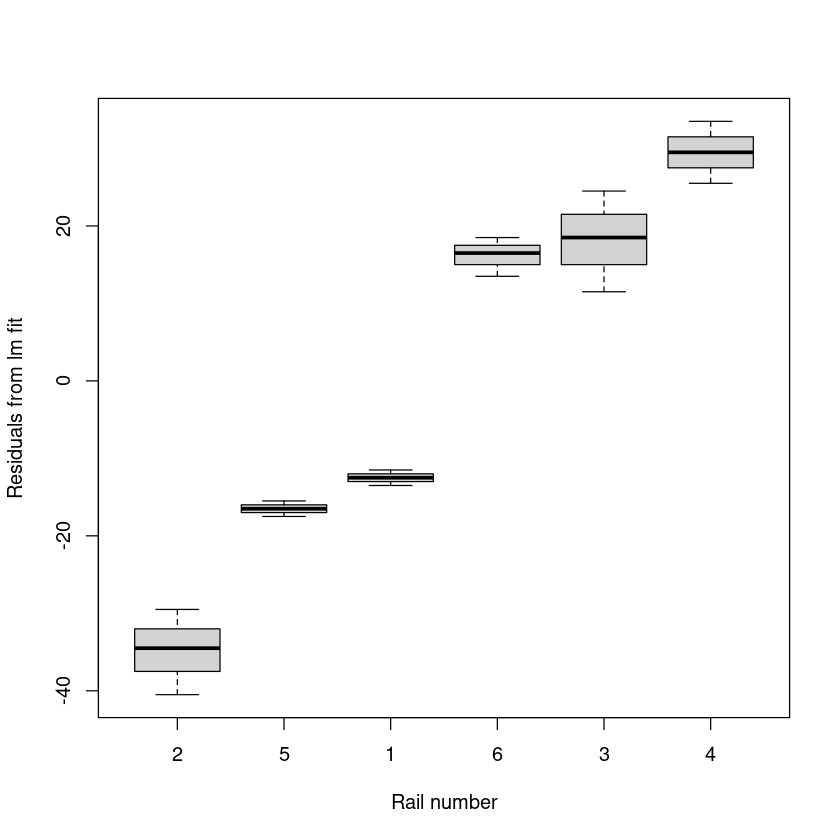

In [8]:
# boxplots of the residuals from the fm1Rail.lm fit by rail number,
# to check for homogeneity of variance
boxplot( residuals(fm1Rail.lm) ~ Rail$Rail, xlab = "Rail number",
         ylab = "Residuals from lm fit" )

The “rail effects” indicated in Figure 1.2 may be incorporated into the
model for the travel times by allowing the mean of each rail to be represented by a separate parameter. This fixed-effects model for the one-way
classification is written <br>
$$yij = βi + eij$$
<b>(1.2)</b> <br>
 $i = 1, . . . , M$, $j = 1, . . . , ni$ <br>
where the βi represents the mean travel time of rail i and, as in (1.1), the
errors eij are assumed to be independently distributed as N (0, σ2). We can
again use lm to fit (1.2)

In [11]:
fm2Rail.lm <- lm( travel ~ Rail - 1, data = Rail )
fm2Rail.lm


Call:
lm(formula = travel ~ Rail - 1, data = Rail)

Coefficients:
Rail2  Rail5  Rail1  Rail6  Rail3  Rail4  
31.67  50.00  54.00  82.67  84.67  96.00  


The residual standard error
obtained for the fixed-effects model (1.2), $\hat{σ} = 4.0208$, is about one-sixth
of the corresponding estimate obtained for the single-mean model (1.1),
indicating that the fm2Rail.lm model has successfully accounted for the rail
effects.

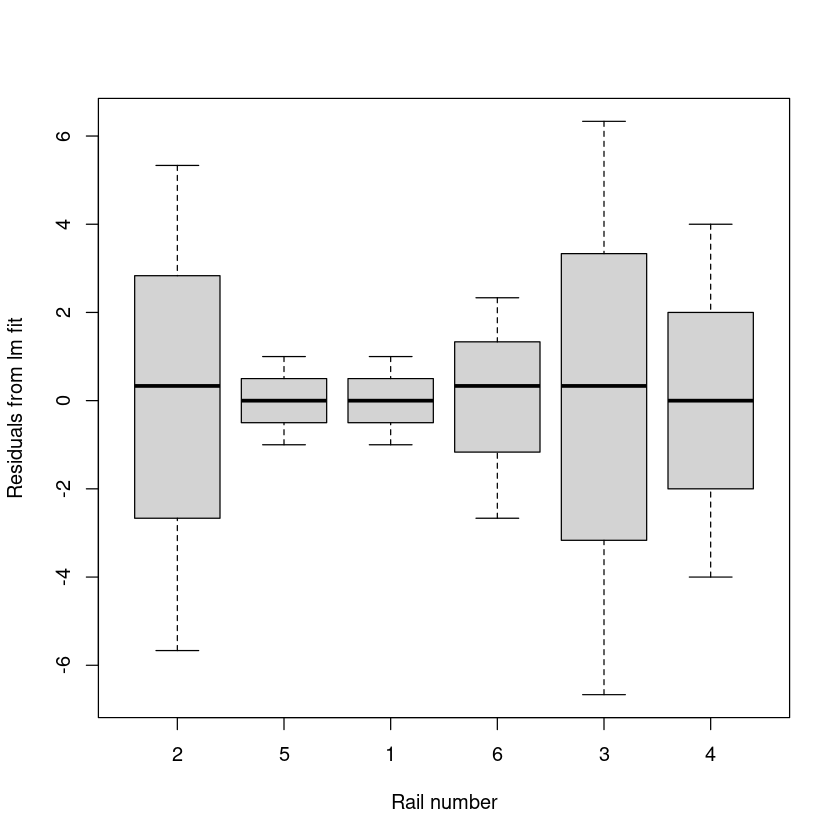

In [12]:
boxplot( residuals(fm2Rail.lm) ~ Rail$Rail, xlab = "Rail number",
         ylab = "Residuals from lm fit" )

The residuals are now centered around
zero and have considerably smaller magnitudes than those in Figure 1.2.

<h1>1.1.1 Fitting the Random-Effects Model With lme

* the first two arguments to lme, fixed and data

* The third argument, random, is a onesided formula describing the random effects and the grouping structure for the model.

$$y_{ij} = β + b_i + \epsilon_{ij}$$ 
<b>(1.4)</b>

$$b_i ∼ N(0, σ_b^2)$$ 
$$\epsilon_{ij} ∼ N(0, σ^2)$$

<b>(1.5)</b>

We obtain the restricted maximum likelihood fit of the model given by
(1.4) and (1.5) to the Rail data with

In [7]:
fm1Rail.lme <- lme(travel ~ 1, data = Rail, random = ~ 1 | Rail)

summary( fm1Rail.lme )

Linear mixed-effects model fit by REML
  Data: Rail 
      AIC      BIC   logLik
  128.177 130.6766 -61.0885

Random effects:
 Formula: ~1 | Rail
        (Intercept) Residual
StdDev:    24.80547 4.020779

Fixed effects:  travel ~ 1 
            Value Std.Error DF  t-value p-value
(Intercept)  66.5  10.17104 12 6.538173       0

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-1.61882658 -0.28217671  0.03569328  0.21955784  1.61437744 

Number of Observations: 18
Number of Groups: 6 

We see that the REML estimates for the parameters have been calculated
as
$\hat{β} = 66.5$, $\hat{σ_b} = 24.805$, $\hat{σ} = 4.0208$

* To examine the maximum likelihood 
* A convenient way of fitting such alternative models is to use the update function

In [8]:
fm1Rail.lmeML <- update( fm1Rail.lme, method = "ML" )
summary( fm1Rail.lmeML )

Linear mixed-effects model fit by maximum likelihood
  Data: Rail 
     AIC      BIC    logLik
  134.56 137.2312 -64.28002

Random effects:
 Formula: ~1 | Rail
        (Intercept) Residual
StdDev:    22.62435 4.020779

Fixed effects:  travel ~ 1 
            Value Std.Error DF  t-value p-value
(Intercept)  66.5  9.554026 12 6.960417       0

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-1.61098123 -0.28887045  0.03454166  0.21372780  1.62222279 

Number of Observations: 18
Number of Groups: 6 

<h2>1.1.2 Assessing the Fitted Model

<h3>residuals versus the fitted responses

* The fitted model can, and should, be examined using graphical and numerical summaries. 
One graphical summary that should be examined routinely
is a plot of the <b>residuals versus the fitted responses</b> from the model. This
plot is used to assess the assumption of constant variance of the $\epsilon_{ij}$.

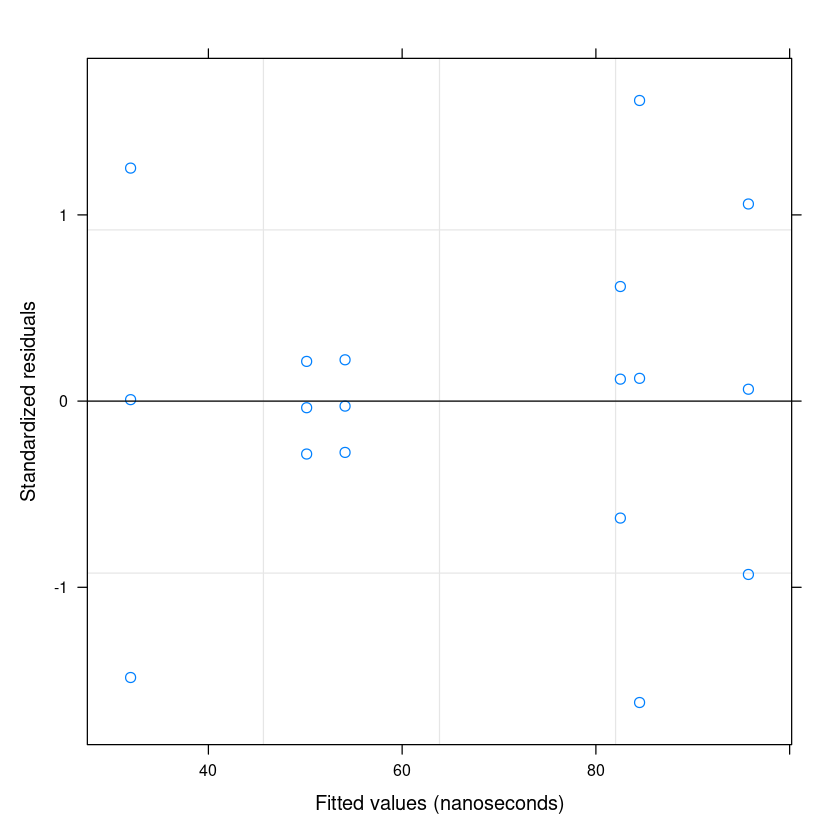

In [9]:
plot( fm1Rail.lme )

* we are looking for a systematic increase
* the residuals on the right-hand side of the plot will have a greater vertical spread than those on the left, forming a horizontal “wedge-shaped” pattern. 
* Such a pattern is not evident in Figure 1.4

<img src="figuras/figure 1.4.png" width="500">

<h3> confidence intervals

 confidence intervals on the parameters, $β$, $σ$ and $σ_b$, as
produced by the intervals function.

In [10]:
intervals( fm1Rail.lme )

Approximate 95% confidence intervals

 Fixed effects:
               lower est.    upper
(Intercept) 44.33921 66.5 88.66079

 Random Effects:
  Level: Rail 
                   lower     est.    upper
sd((Intercept)) 13.27436 24.80547 46.35335

 Within-group standard error:
   lower     est.    upper 
2.695012 4.020779 5.998737 

* We can see that there is considerable imprecision in the estimates of all three of these parameters

<h3>significance of terms

Another numerical summary, used to assess the significance of terms in
the fixed-effects part of the model, is produced by the anova function

In [11]:
anova( fm1Rail.lme )

,numDF,denDF,F-value,p-value
,<int>,<dbl>,<dbl>,<dbl>
(Intercept),1,12,42.7477,2.776951e-05


In this case, the fixed-effects model is so simple that the analysis of variance
is trivial. The hypothesis being tested here is $β = 0$. The <b>p-value</b>, which
is that probability of observing data as unusual as these or even more so
when $β$ actually is $0$, is so small as to rule out this possibility. Regardless
of the <b>p-value</b>, the hypothesis $β = 0$ is of no practical interest here because
the data have been shifted by subtracting $36,100$ nanoseconds from each
measurement.

<h1>1.3 Mixed-Effects Models for Replicated, Blocked
Designs </h1>

<h2> MACHINES

In [2]:
library(nlme)
data(Machines)

head(Machines, 5)

,Worker,Machine,score
,<ord>,<fct>,<dbl>
1,1,A,52.0
2,1,A,52.8
3,1,A,53.1
4,2,A,51.8
5,2,A,52.8


An interaction plot for the productivity scores for six different
workers using three different machine types:

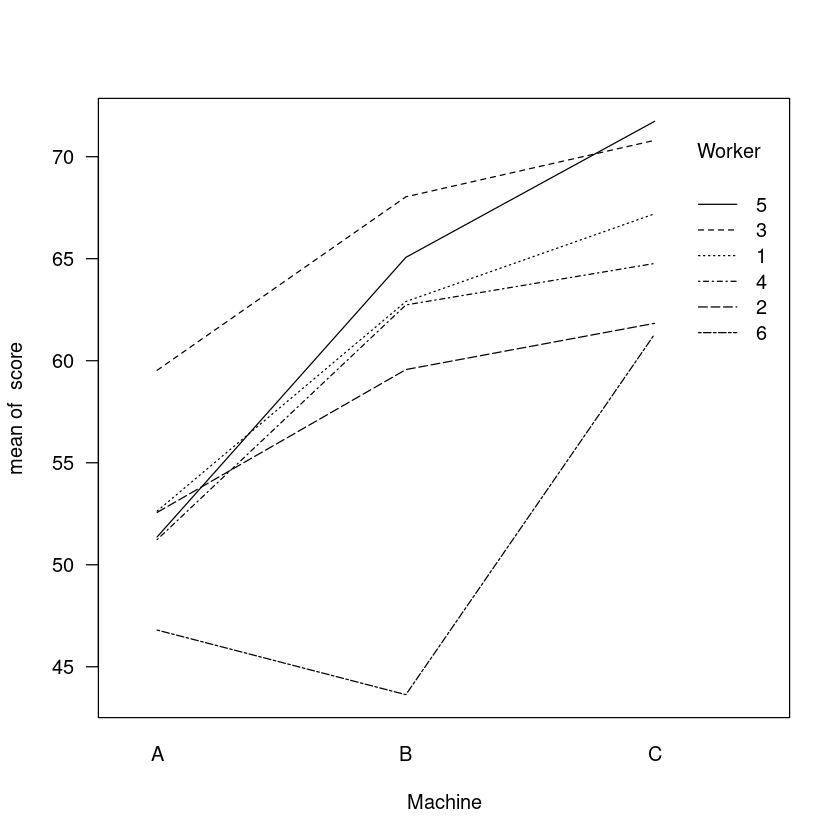

In [4]:
attach( Machines ) # make variables in Machines available by name
interaction.plot( Machine, Worker, score, las = 1) # Figure 1.10
detach() # undo the effect of ‘attach( Machines )’

If there were no interactions between machines and workers, the lines
in the interaction plot would be approximately parallel.

<h3>1.3.1 Fitting Random Interaction Terms</h3> <br>
A model without interactions has the same form as the model for the
ergometric experiment.

$$ y_{ijk} = β_j + b_i + \epsilon_{ijk} $$ 

$i = 1, . . . , 6$, $j = 1, . . . , 3$, $k = 1, . . . , 3$, <br>
$b_i ∼ N(0, σb2)$, $\epsilon_{ijk} ∼ N(0, σ2)$.  <br> <b>(1.7)</b> <br>
There is a fixed effect for each type of machine and a random effect for
each worker. As before, the fixed effects for the machines will be re-coded
as an intercept and a set of contrasts when we fit this model as

In [5]:
fm1Machine <- lme( score ~ Machine, data = Machines, random = ~ 1 | Worker )

fm1Machine

Linear mixed-effects model fit by REML
  Data: Machines 
  Log-restricted-likelihood: -143.4391
  Fixed: score ~ Machine 
(Intercept)    MachineB    MachineC 
  52.355556    7.966667   13.916667 

Random effects:
 Formula: ~1 | Worker
        (Intercept) Residual
StdDev:    5.146552 3.161647

Number of Observations: 54
Number of Groups: 6 

The model incorporating the random interaction terms, <br>
$b_{ij}$, $i = 1, . . . , 6$, $j = 1, . . . , 3$, is

$$y_{ijk} = β_j + b_i + b_{ij} + \epsilon_{ijk}$$

$i = 1, . . . , 6$, $j = 1, . . . , 3$, $k = 1, . . . , 3$ 

$b_i ∼ N(0, σ_1^2)$, $b_{ij} ∼ N(0, σ_2^2)$, $\epsilon_{ijk} ∼ N(0, σ2)$

* This model has random effects at two levels: the effects $b_i$ for the worker and the effects $b_{ij}$ for the type of machine within each worker. In a call to lme we can express this nesting as <b>Worker/Machine</b>
* This expression is read as <b>“Worker and ‘Machine within Worker’ ”</b> 

In [12]:
fm2Machine <- update( fm1Machine, random = ~ 1 | Worker/Machine )
fm2Machine

Linear mixed-effects model fit by REML
  Data: Machines 
  Log-restricted-likelihood: -107.8438
  Fixed: score ~ Machine 
(Intercept)    MachineB    MachineC 
  52.355556    7.966667   13.916667 

Random effects:
 Formula: ~1 | Worker
        (Intercept)
StdDev:     4.78105

 Formula: ~1 | Machine %in% Worker
        (Intercept)  Residual
StdDev:    3.729532 0.9615771

Number of Observations: 54
Number of Groups: 
             Worker Machine %in% Worker 
                  6                  18 

In [13]:
anova( fm1Machine, fm2Machine )

,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
fm1Machine,"lme.formula(fixed = score ~ Machine, data = Machines, random = ~1 | Worker)",1,5,296.8782,306.5373,-143.4391,,NA,NA
fm2Machine,"lme.formula(fixed = score ~ Machine, data = Machines, random = ~1 | Worker/Machine)",2,6,227.6876,239.2785,-107.8438,1 vs 2,71.19063,3.24324e-17
